In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import chardet
import datetime
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/lending-club/rejected_2007_to_2018Q4.csv.gz
/kaggle/input/lending-club/accepted_2007_to_2018Q4.csv.gz
/kaggle/input/lending-club/accepted_2007_to_2018q4.csv/accepted_2007_to_2018Q4.csv
/kaggle/input/lending-club/rejected_2007_to_2018q4.csv/rejected_2007_to_2018Q4.csv


In [4]:
#using chardet to see if there is anytype of enconding involved
with open("../input/lending-club/accepted_2007_to_2018Q4.csv.gz", 'rb') as rawdata:
    result = chardet.detect(rawdata.read(10000))
print(result)    

{'encoding': None, 'confidence': 0.0, 'language': None}


In [5]:
accepted=pd.read_csv("../input/lending-club/accepted_2007_to_2018Q4.csv.gz",low_memory=False)
rejected=pd.read_csv("../input/lending-club/rejected_2007_to_2018Q4.csv.gz",low_memory=False)
np.random.seed(0) 

In [6]:
accepted .shape

(2260701, 151)

In [7]:
accepted.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,66310712,NaN,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
rejected .shape

(27648741, 9)

In [9]:
rejected.head()

,Amount Requested,Application Date,Loan Title,Risk_Score,Debt-To-Income Ratio,Zip Code,State,Employment Length,Policy Code
0,1000.0,2007-05-26,Wedding Covered but No Honeymoon,693.0,10%,481xx,NM,4 years,0.0
1,1000.0,2007-05-26,Consolidating Debt,703.0,10%,010xx,MA,< 1 year,0.0
2,11000.0,2007-05-27,Want to consolidate my debt,715.0,10%,212xx,MD,1 year,0.0
3,6000.0,2007-05-27,waksman,698.0,38.64%,017xx,MA,< 1 year,0.0
4,1500.0,2007-05-27,mdrigo,509.0,9.43%,209xx,MD,< 1 year,0.0


In [10]:
# percent of data that is missing in accepted table
missing_values_count = accepted.isnull().sum()
total_cells = np.product(accepted.shape)
total_missing = missing_values_count.sum()
percent_missing = (total_missing/total_cells) * 100
print(percent_missing)

31.78005318405443


In [11]:
# percent of data that is missing in rejected table
missing_values = rejected.isnull().sum()
total_cell = np.product(rejected.shape)
total_missing_val = missing_values.sum()
percent_missing_rej = (total_missing_val/total_cell) * 100
print(percent_missing_rej)

7.816920528537306


In [12]:
#checking datatype of dates in rejected column
print(rejected['Application Date'].head())

0    2007-05-26
1    2007-05-26
2    2007-05-27
3    2007-05-27
4    2007-05-27
Name: Application Date, dtype: object


In [13]:
#As the dates were in object dtype now we convert them into datetime64 format
rejected['date_parsed'] = pd.to_datetime(rejected['Application Date'], format="%Y/%m/%d")
print(rejected['date_parsed'].head())

0   2007-05-26
1   2007-05-26
2   2007-05-27
3   2007-05-27
4   2007-05-27
Name: date_parsed, dtype: datetime64[ns]


In [14]:
#finding out the percentage of missing values in each column in accepted table
missing_cols = round(100*(accepted.isnull().sum()/len(accepted.index)), 2)
missing_cols.sort_values(ascending=False)

member_id                                     100.00
orig_projected_additional_accrued_interest     99.62
hardship_end_date                              99.52
hardship_start_date                            99.52
hardship_type                                  99.52
                                               ...  
pub_rec                                         0.00
open_acc                                        0.00
inq_last_6mths                                  0.00
fico_range_high                                 0.00
id                                              0.00
Length: 151, dtype: float64

In [15]:
#finding total number of columns who have missing values <70%
columns_with_missing_values = list(missing_cols[missing_cols >= 70].index)
len(columns_with_missing_values)


41

In [16]:
#dropping columns with missing values <70% which is 41 columns
accepted.drop(columns = columns_with_missing_values,inplace = True)


In [17]:
#finding out the percentage of missing values in each column in accepted table
missing_column = round(100*(rejected.isnull().sum()/len(rejected.index)))
missing_column.sort_values(ascending=False)


Risk_Score              67.0
Employment Length        3.0
Amount Requested         0.0
Application Date         0.0
Loan Title               0.0
Debt-To-Income Ratio     0.0
Zip Code                 0.0
State                    0.0
Policy Code              0.0
date_parsed              0.0
dtype: float64

In [18]:
# As per above code output only one column that is Risk_score has 67% missing values and all other columns have a very few 
#NaN values


In [19]:
# seeing how many non- null colums are there in rejected table
columns_with_na_dropped = rejected.dropna(axis=1)
columns_with_na_dropped.head()

,Amount Requested,Application Date,Debt-To-Income Ratio,date_parsed
0,1000.0,2007-05-26,10%,2007-05-26
1,1000.0,2007-05-26,10%,2007-05-26
2,11000.0,2007-05-27,10%,2007-05-27
3,6000.0,2007-05-27,38.64%,2007-05-27
4,1500.0,2007-05-27,9.43%,2007-05-27


In [20]:
accepted.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
0,68407277,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,...,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,N,Cash,N
1,68355089,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,...,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,N,Cash,N
2,68341763,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,truck driver,...,50.0,0.0,0.0,218418.0,18696.0,6200.0,14877.0,N,Cash,N
3,66310712,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,Information Systems Officer,...,0.0,0.0,0.0,381215.0,52226.0,62500.0,18000.0,N,Cash,N
4,68476807,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,Contract Specialist,...,60.0,0.0,0.0,439570.0,95768.0,20300.0,88097.0,N,Cash,N


In [21]:
#assigning accepted database to X for further executions
X = accepted.copy()
X.select_dtypes('object').head()

,id,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,...,addr_state,earliest_cr_line,initial_list_status,last_pymnt_d,next_pymnt_d,last_credit_pull_d,application_type,hardship_flag,disbursement_method,debt_settlement_flag
0,68407277,36 months,C,C4,leadman,10+ years,MORTGAGE,Not Verified,Dec-2015,Fully Paid,...,PA,Aug-2003,w,Jan-2019,NaN,Mar-2019,Individual,N,Cash,N
1,68355089,36 months,C,C1,Engineer,10+ years,MORTGAGE,Not Verified,Dec-2015,Fully Paid,...,SD,Dec-1999,w,Jun-2016,NaN,Mar-2019,Individual,N,Cash,N
2,68341763,60 months,B,B4,truck driver,10+ years,MORTGAGE,Not Verified,Dec-2015,Fully Paid,...,IL,Aug-2000,w,Jun-2017,NaN,Mar-2019,Joint App,N,Cash,N
3,66310712,60 months,C,C5,Information Systems Officer,10+ years,MORTGAGE,Source Verified,Dec-2015,Current,...,NJ,Sep-2008,w,Feb-2019,Apr-2019,Mar-2019,Individual,N,Cash,N
4,68476807,60 months,F,F1,Contract Specialist,3 years,MORTGAGE,Source Verified,Dec-2015,Fully Paid,...,PA,Jun-1998,w,Jul-2016,NaN,Mar-2018,Individual,N,Cash,N


In [22]:
keep_list = ['addr_state', 'annual_inc', 'dti', 'earliest_cr_line', 'emp_length', 'fico_range_low', 'home_ownership',
             'initial_list_status', 'int_rate', 'loan_amnt', 'loan_status','mths_since_rcnt_il',
             'mths_since_recent_bc', 'mths_since_recent_inq', 'mort_acc', 'pub_rec', 'revol_bal', 
             'revol_util', 'sub_grade', 'term', 'title', 'total_acc', 'verification_status']
print(keep_list)
print(len(keep_list))

['addr_state', 'annual_inc', 'dti', 'earliest_cr_line', 'emp_length', 'fico_range_low', 'home_ownership', 'initial_list_status', 'int_rate', 'loan_amnt', 'loan_status', 'mths_since_rcnt_il', 'mths_since_recent_bc', 'mths_since_recent_inq', 'mort_acc', 'pub_rec', 'revol_bal', 'revol_util', 'sub_grade', 'term', 'title', 'total_acc', 'verification_status']
23


In [23]:
#assigning all columns which were not present in keep_list to drop_list
drop_list = [col for col in X.columns if col not in keep_list]
print(drop_list)
print(len(drop_list))

['id', 'funded_amnt', 'funded_amnt_inv', 'installment', 'grade', 'emp_title', 'issue_d', 'pymnt_plan', 'url', 'purpose', 'zip_code', 'delinq_2yrs', 'fico_range_high', 'inq_last_6mths', 'mths_since_last_delinq', 'open_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 'last_fico_range_high', 'last_fico_range_low', 'collections_12_mths_ex_med', 'policy_code', 'application_type', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_act_il', 'open_il_12m', 'open_il_24m', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl

In [24]:
accepted.shape

(2260701, 110)

In [25]:
w = [col for col in keep_list if col not in X.columns]



In [26]:
#dropping all columns in drop_list
X.drop(labels=drop_list, axis=1, inplace=True)

In [27]:
X.columns

Index(['loan_amnt', 'term', 'int_rate', 'sub_grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'loan_status',
       'title', 'addr_state', 'dti', 'earliest_cr_line', 'fico_range_low',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'mths_since_rcnt_il', 'mort_acc',
       'mths_since_recent_bc', 'mths_since_recent_inq'],
      dtype='object')

In [28]:
X.fillna(method='bfill', axis=0).fillna(0)

,loan_amnt,term,int_rate,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,title,...,fico_range_low,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,mths_since_rcnt_il,mort_acc,mths_since_recent_bc,mths_since_recent_inq
0,3600.0,36 months,13.99,C4,10+ years,MORTGAGE,55000.0,Not Verified,Fully Paid,Debt consolidation,...,675.0,0.0,2765.0,29.7,13.0,w,21.0,1.0,4.0,4.0
1,24700.0,36 months,11.99,C1,10+ years,MORTGAGE,65000.0,Not Verified,Fully Paid,Business,...,715.0,0.0,21470.0,19.2,38.0,w,19.0,4.0,2.0,0.0
2,20000.0,60 months,10.78,B4,10+ years,MORTGAGE,63000.0,Not Verified,Fully Paid,Debt consolidation,...,695.0,0.0,7869.0,56.2,18.0,w,19.0,5.0,101.0,10.0
3,35000.0,60 months,14.85,C5,10+ years,MORTGAGE,110000.0,Source Verified,Current,Debt consolidation,...,785.0,0.0,7802.0,11.6,17.0,w,23.0,1.0,2.0,1.0
4,10400.0,60 months,22.45,F1,3 years,MORTGAGE,104433.0,Source Verified,Fully Paid,Major purchase,...,695.0,0.0,21929.0,64.5,35.0,w,14.0,6.0,4.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260696,40000.0,60 months,10.49,B3,9 years,MORTGAGE,227000.0,Verified,Current,Debt consolidation,...,705.0,0.0,8633.0,64.9,37.0,f,15.0,3.0,41.0,1.0
2260697,24000.0,60 months,14.49,C4,6 years,RENT,110000.0,Not Verified,Charged Off,Debt consolidation,...,660.0,1.0,17641.0,68.1,31.0,f,20.0,2.0,9.0,9.0
2260698,14000.0,60 months,14.49,C4,10+ years,MORTGAGE,95000.0,Verified,Current,0,...,660.0,0.0,7662.0,54.0,22.0,w,7.0,1.0,75.0,6.0
2260699,0.0,0,0.00,0,0,0,0.0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0


In [29]:
X.head()

,loan_amnt,term,int_rate,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,title,...,fico_range_low,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,mths_since_rcnt_il,mort_acc,mths_since_recent_bc,mths_since_recent_inq
0,3600.0,36 months,13.99,C4,10+ years,MORTGAGE,55000.0,Not Verified,Fully Paid,Debt consolidation,...,675.0,0.0,2765.0,29.7,13.0,w,21.0,1.0,4.0,4.0
1,24700.0,36 months,11.99,C1,10+ years,MORTGAGE,65000.0,Not Verified,Fully Paid,Business,...,715.0,0.0,21470.0,19.2,38.0,w,19.0,4.0,2.0,0.0
2,20000.0,60 months,10.78,B4,10+ years,MORTGAGE,63000.0,Not Verified,Fully Paid,NaN,...,695.0,0.0,7869.0,56.2,18.0,w,19.0,5.0,101.0,10.0
3,35000.0,60 months,14.85,C5,10+ years,MORTGAGE,110000.0,Source Verified,Current,Debt consolidation,...,785.0,0.0,7802.0,11.6,17.0,w,23.0,1.0,2.0,NaN
4,10400.0,60 months,22.45,F1,3 years,MORTGAGE,104433.0,Source Verified,Fully Paid,Major purchase,...,695.0,0.0,21929.0,64.5,35.0,w,14.0,6.0,4.0,1.0


In [30]:
X.describe()

,loan_amnt,int_rate,annual_inc,dti,fico_range_low,pub_rec,revol_bal,revol_util,total_acc,mths_since_rcnt_il,mort_acc,mths_since_recent_bc,mths_since_recent_inq
count,2.260668e+06,2.260668e+06,2.260664e+06,2.258957e+06,2.260668e+06,2.260639e+06,2.260668e+06,2.258866e+06,2.260639e+06,1.350744e+06,2.210638e+06,2.187256e+06,1.965233e+06
mean,1.504693e+04,1.309283e+01,7.799243e+04,1.882420e+01,6.985882e+02,1.975278e-01,1.665846e+04,5.033770e+01,2.416255e+01,2.122236e+01,1.555382e+00,2.484485e+01,7.024194e+00
std,9.190245e+03,4.832138e+00,1.126962e+05,1.418333e+01,3.301038e+01,5.705150e-01,2.294831e+04,2.471307e+01,1.198753e+01,2.604919e+01,1.904981e+00,3.231925e+01,5.965411e+00
min,5.000000e+02,5.310000e+00,0.000000e+00,-1.000000e+00,6.100000e+02,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,8.000000e+03,9.490000e+00,4.600000e+04,1.189000e+01,6.750000e+02,0.000000e+00,5.950000e+03,3.150000e+01,1.500000e+01,7.000000e+00,0.000000e+00,6.000000e+00,2.000000e+00
50%,1.290000e+04,1.262000e+01,6.500000e+04,1.784000e+01,6.900000e+02,0.000000e+00,1.132400e+04,5.030000e+01,2.200000e+01,1.300000e+01,1.000000e+00,1.400000e+01,5.000000e+00
75%,2.000000e+04,1.599000e+01,9.300000e+04,2.449000e+01,7.150000e+02,0.000000e+00,2.024600e+04,6.940000e+01,3.100000e+01,2.400000e+01,3.000000e+00,3.000000e+01,1.100000e+01
max,4.000000e+04,3.099000e+01,1.100000e+08,9.990000e+02,8.450000e+02,8.600000e+01,2.904836e+06,8.923000e+02,1.760000e+02,5.110000e+02,9.400000e+01,6.610000e+02,2.500000e+01


In [31]:
#seeing various values in loan_status
X['loan_status'].value_counts()

Fully Paid                                             1076751
Current                                                 878317
Charged Off                                             268559
Late (31-120 days)                                       21467
In Grace Period                                           8436
Late (16-30 days)                                         4349
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     40
Name: loan_status, dtype: int64

In [32]:
#categorising loan status into just two categories
X.loc[X['loan_status'] == 'Current', 'loan_status'] = 1
X.loc[X['loan_status'] == 'Fully Paid', 'loan_status'] = 1
X.loc[X['loan_status'] == 'In Grace Period', 'loan_status'] = 1
X.loc[X['loan_status'] == 'Does not meet the credit policy. Status:Fully Paid'] = 1
X.loc[X['loan_status'] == 'Charged Off', 'loan_status'] = 0
X.loc[X['loan_status'] == 'Late (31-120 days)', 'loan_status'] = 0
X.loc[X['loan_status'] == 'Late (16-30 days)', 'loan_status'] = 0
X.loc[X['loan_status'] == 'Default', 'loan_status'] = 0
X.loc[X['loan_status'] == 'Does not meet the credit policy. Status:Charged Off']= 0

In [33]:
X['loan_status'].value_counts()

1    1965492
0     295176
Name: loan_status, dtype: int64

<AxesSubplot:ylabel='int_rate'>

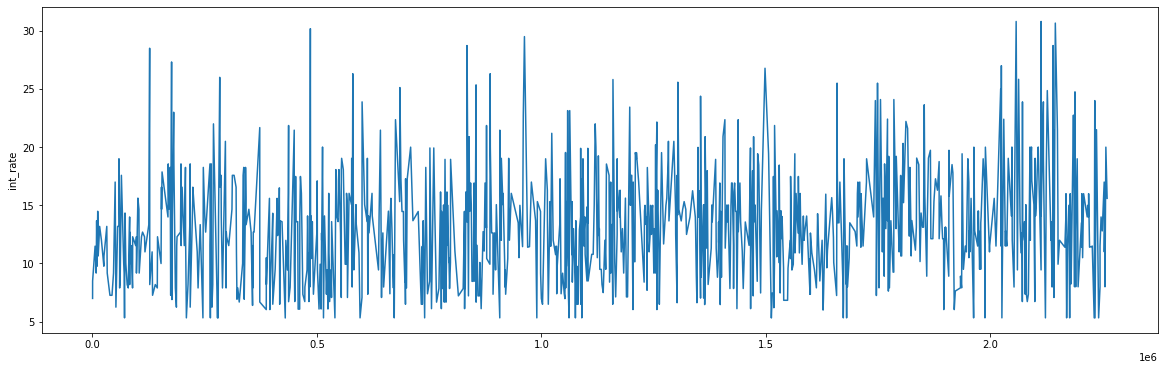

In [34]:
XX = X.sample(1000)
plt.figure(figsize=(20,6))
sns.lineplot(data=XX['int_rate'])

<AxesSubplot:ylabel='int_rate'>

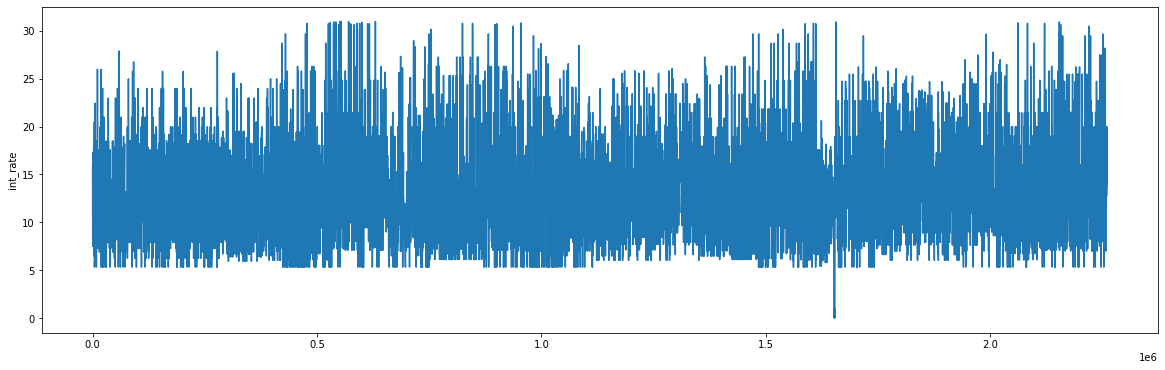

In [35]:
X1 = X.sample(10000)
plt.figure(figsize=(20,6))
sns.lineplot(data=X1['int_rate'])

In [36]:
#from the above line charts we can conclude that interest rate was never below 5. Also maximum peaks are in range 5 to 20

<AxesSubplot:ylabel='Risk_Score'>

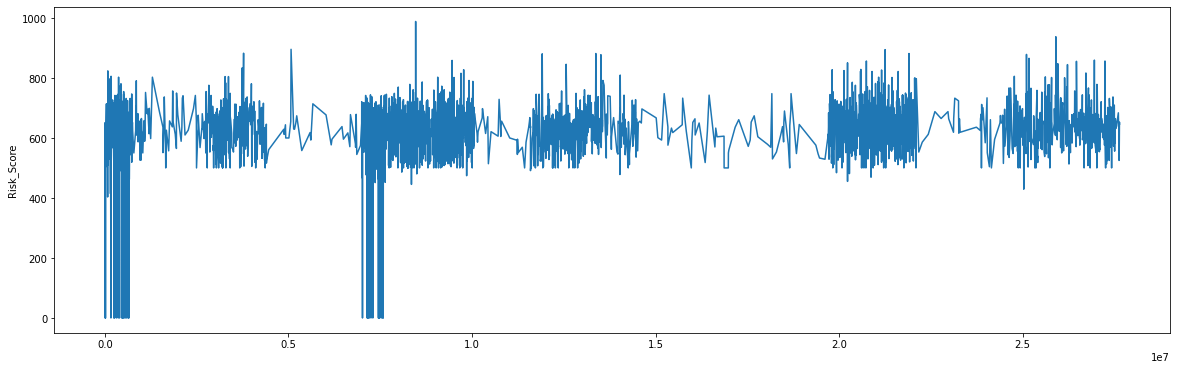

In [37]:
plt.figure(figsize=(20,6))
Y=rejected.sample(10000)
sns.lineplot(data=Y['Risk_Score'])


In [38]:
#from the above line charts we can come to an conclusion that most of the clients which were rejected had the Risk score 
#between 500 and 850 approx. 

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='int_rate'>

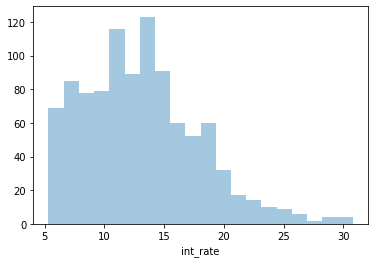

In [39]:
sns.distplot(a=XX['int_rate'], kde=False)

<AxesSubplot:xlabel='int_rate'>

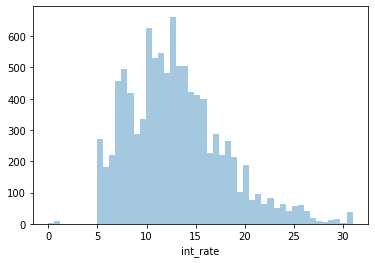

In [40]:
sns.distplot(a=X1['int_rate'], kde=False)

In [41]:
#from the above distribution charts we can again conclude that interest rate was mostly above 5. Also 
#maximum interest rates are in range 5 to 20

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 34.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='loan_status', ylabel='loan_amnt'>

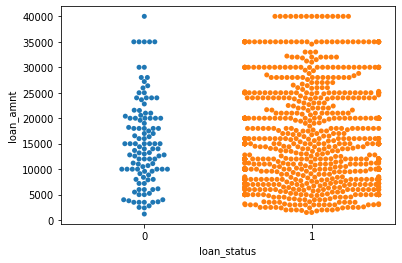

In [42]:
sns.swarmplot(x=XX['loan_status'],
              y=XX['loan_amnt'])

In [43]:
#we can see from this scatter plot that loan amount mostly ranges from 0 to 25000. Also amount that is paid back i.e 1 is 
# much more that 0 which is not paid or late, this can be in the benfit of the company.

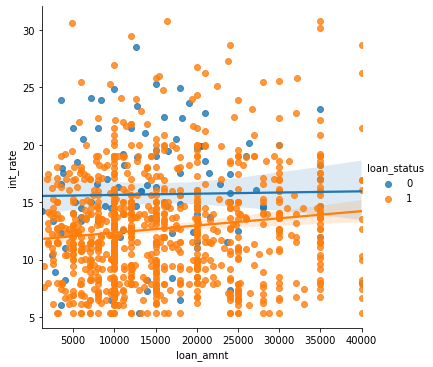

In [44]:
sns.lmplot(x="loan_amnt", y="int_rate", hue="loan_status", data=XX)

In [45]:
#Regression Line for Not paid (blue) has more steep than that of paid(Orange)

# Logistic Regression

In [46]:
X1 = X.dropna()

In [47]:
X1.loan_status

0          1
1          1
4          1
6          1
7          1
          ..
2260691    0
2260692    1
2260693    1
2260695    1
2260697    0
Name: loan_status, Length: 1092086, dtype: object

In [48]:
X1['loan_status'] = X1['loan_status'].astype(float)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [49]:
from sklearn.model_selection import train_test_split

In [50]:
X1.groupby('loan_status').mean()

,loan_amnt,int_rate,annual_inc,dti,fico_range_low,pub_rec,revol_bal,revol_util,total_acc,mths_since_rcnt_il,mort_acc,mths_since_recent_bc,mths_since_recent_inq
loan_status,,,,,,,,,,,,,
0.0,16249.667551,15.952263,77155.604463,20.413208,684.156580,0.273864,15318.425307,50.285341,24.598198,17.126164,1.249253,18.883542,5.929637
1.0,15445.108060,12.751199,85015.710189,19.202718,699.691835,0.201737,17085.046553,46.404632,24.534646,19.135818,1.530146,23.321716,7.193643


In [51]:
X1_in = X1.drop('loan_status', axis=1)
feature_cols = [X1_in.columns]
feature_cols

[Index(['loan_amnt', 'term', 'int_rate', 'sub_grade', 'emp_length',
        'home_ownership', 'annual_inc', 'verification_status', 'title',
        'addr_state', 'dti', 'earliest_cr_line', 'fico_range_low', 'pub_rec',
        'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
        'mths_since_rcnt_il', 'mort_acc', 'mths_since_recent_bc',
        'mths_since_recent_inq'],
       dtype='object')]

In [52]:
X1_in.head()

,loan_amnt,term,int_rate,sub_grade,emp_length,home_ownership,annual_inc,verification_status,title,addr_state,...,fico_range_low,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,mths_since_rcnt_il,mort_acc,mths_since_recent_bc,mths_since_recent_inq
0,3600.0,36 months,13.99,C4,10+ years,MORTGAGE,55000.0,Not Verified,Debt consolidation,PA,...,675.0,0.0,2765.0,29.7,13.0,w,21.0,1.0,4.0,4.0
1,24700.0,36 months,11.99,C1,10+ years,MORTGAGE,65000.0,Not Verified,Business,SD,...,715.0,0.0,21470.0,19.2,38.0,w,19.0,4.0,2.0,0.0
4,10400.0,60 months,22.45,F1,3 years,MORTGAGE,104433.0,Source Verified,Major purchase,PA,...,695.0,0.0,21929.0,64.5,35.0,w,14.0,6.0,4.0,1.0
6,20000.0,36 months,9.17,B2,10+ years,MORTGAGE,180000.0,Not Verified,Debt consolidation,MN,...,680.0,0.0,87329.0,84.5,27.0,f,18.0,4.0,12.0,10.0
7,20000.0,36 months,8.49,B1,10+ years,MORTGAGE,85000.0,Not Verified,Major purchase,SC,...,705.0,0.0,826.0,5.7,15.0,w,13.0,3.0,32.0,8.0


In [53]:
objects = ['term', 'sub_grade', 'emp_length', 'home_ownership', 'verification_status',
      'title', 'addr_state', 'earliest_cr_line', 'initial_list_status']
X1_in[objects] = X1_in[objects].astype(str)

In [54]:
X1_in.term

0           36 months
1           36 months
4           60 months
6           36 months
7           36 months
              ...    
2260691     60 months
2260692     60 months
2260693     60 months
2260695     60 months
2260697     60 months
Name: term, Length: 1092086, dtype: object

In [55]:
data_other_cols = X1_in.drop(['term','sub_grade', 'emp_length', 'home_ownership', 'verification_status','title', 'addr_state', 'earliest_cr_line', 'initial_list_status'], axis=1)
data_other_cols

,loan_amnt,int_rate,annual_inc,dti,fico_range_low,pub_rec,revol_bal,revol_util,total_acc,mths_since_rcnt_il,mort_acc,mths_since_recent_bc,mths_since_recent_inq
0,3600.0,13.99,55000.0,5.91,675.0,0.0,2765.0,29.7,13.0,21.0,1.0,4.0,4.0
1,24700.0,11.99,65000.0,16.06,715.0,0.0,21470.0,19.2,38.0,19.0,4.0,2.0,0.0
4,10400.0,22.45,104433.0,25.37,695.0,0.0,21929.0,64.5,35.0,14.0,6.0,4.0,1.0
6,20000.0,9.17,180000.0,14.67,680.0,0.0,87329.0,84.5,27.0,18.0,4.0,12.0,10.0
7,20000.0,8.49,85000.0,17.61,705.0,0.0,826.0,5.7,15.0,13.0,3.0,32.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260691,32000.0,14.49,157000.0,10.34,735.0,0.0,111598.0,27.4,18.0,16.0,3.0,4.0,15.0
2260692,16000.0,12.79,150000.0,12.25,665.0,4.0,7700.0,55.0,28.0,4.0,0.0,17.0,12.0
2260693,24000.0,10.49,125000.0,10.98,725.0,2.0,22448.0,22.4,22.0,44.0,0.0,0.0,13.0
2260695,24000.0,10.49,108000.0,34.94,695.0,1.0,21665.0,39.0,58.0,16.0,4.0,15.0,4.0


In [56]:
from sklearn.preprocessing import OneHotEncoder
categorical_cols = ['term', 'sub_grade', 'emp_length', 'home_ownership', 'verification_status',
                    'title', 'addr_state', 'earliest_cr_line', 'initial_list_status'] 

onehotencoder = OneHotEncoder()

transformed_data = onehotencoder.fit_transform(X1_in[categorical_cols])

# the above transformed_data is an array so convert it to dataframe
encoded_data = pd.DataFrame(transformed_data, index=X1_in.index)

# now concatenate the original data and the encoded data using pandas
concatenated_data = pd.concat([data_other_cols, encoded_data], axis=1)

In [57]:
concatenated_data = concatenated_data[['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'fico_range_low','pub_rec',
                                      'revol_bal', 'revol_util','total_acc', 'mths_since_rcnt_il',
                                      'mort_acc', 'mths_since_recent_bc','mths_since_recent_inq']]

In [58]:
feature_cols = ['loan_amnt', 'term', 'int_rate', 'sub_grade', 'emp_length', 'home_ownership', 
                'annual_inc', 'verification_status', 'title',
                'addr_state', 'dti', 'earliest_cr_line', 'fico_range_low', 'pub_rec',
                'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
                'mths_since_rcnt_il', 'mort_acc', 'mths_since_recent_bc','mths_since_recent_inq']

In [59]:
X = concatenated_data
y = X1['loan_status']

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [61]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()
logistic.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [62]:
y_pred=logistic.predict(X_test)

In [63]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[   192,  28235],
       [   571, 244024]])

In [64]:
class_rep = metrics.classification_report(y_test,y_pred, target_names=['Charged Off', 'Fully Paid'])
print(class_rep)

              precision    recall  f1-score   support

 Charged Off       0.25      0.01      0.01     28427
  Fully Paid       0.90      1.00      0.94    244595

    accuracy                           0.89    273022
   macro avg       0.57      0.50      0.48    273022
weighted avg       0.83      0.89      0.85    273022



In [65]:
class_rep_dict = metrics.classification_report(y_test,y_pred, target_names=['Charged Off', 'Fully Paid'], output_dict=True)
class_rep_dict

{'Charged Off': {'precision': 0.2516382699868938,
  'recall': 0.006754142188764203,
  'f1-score': 0.0131551901336074,
  'support': 28427},
 'Fully Paid': {'precision': 0.8962936027826445,
  'recall': 0.9976655287311679,
  'f1-score': 0.9442666594434792,
  'support': 244595},
 'accuracy': 0.8944920189581792,
 'macro avg': {'precision': 0.5739659363847691,
  'recall': 0.502209835459966,
  'f1-score': 0.4787109247885433,
  'support': 273022},
 'weighted avg': {'precision': 0.8291722091023374,
  'recall': 0.8944920189581792,
  'f1-score': 0.8473195059610795,
  'support': 273022}}

<AxesSubplot:>

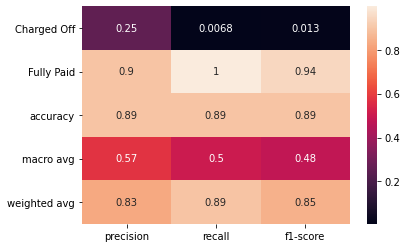

In [66]:
sns.heatmap(pd.DataFrame(class_rep_dict).iloc[:-1,:].T, annot=True)

In [67]:
import pickle
pickle_out = open('classifier.pkl', mode='wb')
pickle.dump(logistic, pickle_out)
pickle_out.close()